In [1]:
import pandas as pd
import numpy as np
ageinc=pd.read_csv('ageinc.csv')
ageinc.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


# Part1:使用 ageinc.csv 資料集，使用 k-means 分群法進行分群

標準化ageinc.csv,建立dataframe標籤

In [2]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler
scale = StandardScaler() #z-scaler物件
ageinc_scaled = pd.DataFrame(scale.fit_transform(ageinc),
                                columns=ageinc.keys())

In [3]:
ageinc_scaled

,income,age
0,0.551088,1.694418
1,-0.777720,-1.131131
2,-1.111030,1.147537
3,-1.194969,0.874097
4,-0.181507,1.238684
...,...,...
995,-0.242130,-0.948837
996,0.381859,0.144923
997,-0.966137,-0.401957
998,-1.609008,-0.766544


In [4]:
ageinc['z_income']=ageinc_scaled['income']
ageinc['z_age']=ageinc_scaled['age']
ageinc.head()

,income,age,z_income,z_age
0,101743,58,0.551088,1.694418
1,49597,27,-0.777720,-1.131131
2,36517,52,-1.111030,1.147537
3,33223,49,-1.194969,0.874097
4,72994,53,-0.181507,1.238684


使用 Elbow 方法找出最佳的分群數量 k

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

K=2的SSE值

In [6]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=10)
kmeans.fit(ageinc_scaled)
kmeans.inertia_

1190.938561812244

K=2~10的SSE值

In [7]:
SSE = []
# 計算 k=2~10 的損失函數
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(ageinc_scaled)
    # kmeans.inertia_
    SSE.append(kmeans.inertia_)

In [8]:
SSE

[1190.938561812244,
 735.4003700524152,
 386.45669565385515,
 341.9971149955688,
 301.9054466165438,
 271.4376222382023,
 242.14394312449474,
 216.34655194764045,
 192.7614486233773]

畫出 Elbow 圖

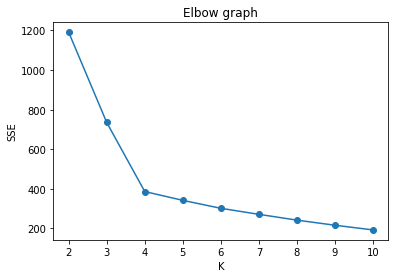

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(2,11), SSE, marker='o')
plt.title('Elbow graph')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

用最佳K值=4,來做分群

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=10)
kmeans.fit(ageinc_scaled)

KMeans(n_clusters=4, random_state=10)

In [11]:
ageinc['kmean_cluster']=kmeans.labels_
ageinc_scaled['kmean_cluster']=kmeans.labels_

In [12]:
kmeans.cluster_centers_

array([[ 0.9194838 ,  0.91047915],
       [ 0.89427821, -0.88065397],
       [-0.857088  ,  0.9050727 ],
       [-0.92800966, -0.89187067]])

# 使用 ageinc.csv 資料集，使用 mean-shift 分群法進行分群

In [13]:
ageinc_shift=pd.read_csv('ageinc.csv')
ageinc_s2 = pd.DataFrame(scale.fit_transform(ageinc_shift),
                                columns=ageinc_shift.keys())

標準化ageinc.csv,建立dataframe標籤

In [14]:
ageinc_shift['z_income']=ageinc_s2['income']
ageinc_shift['z_age']=ageinc_s2['age']
ageinc_shift.head()

,income,age,z_income,z_age
0,101743,58,0.551088,1.694418
1,49597,27,-0.777720,-1.131131
2,36517,52,-1.111030,1.147537
3,33223,49,-1.194969,0.874097
4,72994,53,-0.181507,1.238684


用 estimate_bandwidth 找出最佳帶寬，quantile 設 0.1

In [15]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
bandwidth = estimate_bandwidth(ageinc_s2, quantile=0.1)
print(bandwidth)

0.6371390561473768


用 mean-shift 分群，將分群結果加在 DataFrame 欄位中並列印出來，並說明分群數

In [17]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(ageinc_s2)
labels = ms.labels_

In [18]:
ageinc_shift['MeanShift_cluster']=labels
ageinc_s2['MeanShift_cluster']=labels
ageinc_shift.head()

,income,age,z_income,z_age,MeanShift_cluster
0,101743,58,0.551088,1.694418,2
1,49597,27,-0.777720,-1.131131,3
2,36517,52,-1.111030,1.147537,0
3,33223,49,-1.194969,0.874097,0
4,72994,53,-0.181507,1.238684,0


In [19]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("分群數 : %d" % n_clusters_)

分群數 : 4


k_means繪圖分群結果

In [20]:
#filter rows of original data
filtered_label0 = ageinc['kmean_cluster'] == 0
label0=ageinc[filtered_label0]

filtered_label1 = ageinc['kmean_cluster'] == 1
label1=ageinc[filtered_label1]

filtered_label2 = ageinc['kmean_cluster'] == 2
label2=ageinc[filtered_label2]

filtered_label3 = ageinc['kmean_cluster'] == 3
label3=ageinc[filtered_label3]

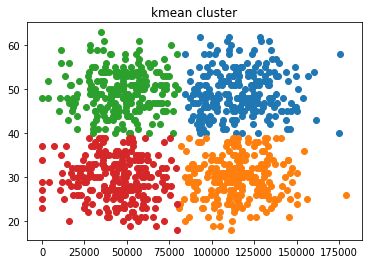

In [21]:
#plotting the results
plt.scatter(label0.iloc[:,0] , label0.iloc[:,1])
plt.scatter(label1.iloc[:,0] , label1.iloc[:,1])
plt.scatter(label2.iloc[:,0] , label2.iloc[:,1])
plt.scatter(label3.iloc[:,0] , label3.iloc[:,1])
plt.title('kmean cluster')
plt.show()

mean-shift繪圖分群結果

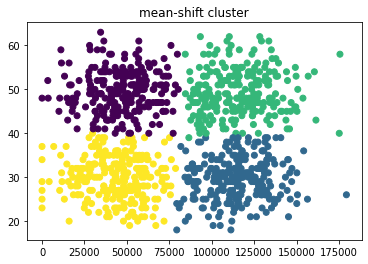

In [22]:
plt.figure()
plt.scatter(ageinc_shift.iloc[:,0], ageinc_shift.iloc[:,1], c = labels)
plt.title('mean-shift cluster')
plt.show()

# 使用 age_education.csv 資料集，使用 k-prototypes 分群法進行分群

將 age 標準化，建立成標準化後的新欄位。

In [23]:
age_edu=pd.read_csv('age_education.csv')
age_edu.head()

,age,education
0,27.007219,college
1,47.615409,highschool
2,51.382815,highschool
3,54.906622,highschool
4,27.719939,less_than_highschool


In [24]:
age_scale=pd.DataFrame(age_edu['age'])

In [25]:
ageinc_scaled = pd.DataFrame(scale.fit_transform(age_scale),
                                columns=age_scale.keys())

In [26]:
age_edu['z_age']=ageinc_scaled['age']
age_edu=age_edu.drop('age',axis=1)
age_edu.head()

,education,z_age
0,college,-1.446982
1,highschool,0.438918
2,highschool,0.783681
3,highschool,1.106153
4,less_than_highschool,-1.381759


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(age_edu)
data_le['education'] = labelencoder.fit_transform(data_le['education'])
data_le

,education,z_age
0,0,-1.446982
1,1,0.438918
2,1,0.783681
3,1,1.106153
4,2,-1.381759
...,...,...
995,2,1.348098
996,0,-1.747175
997,1,0.915993
998,1,1.060818


In [28]:
matrix = np.array(data_le)

用 k-prototypes 分群

In [39]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters= 3, random_state=10)
clusters = kproto.fit_predict(matrix,categorical=[1])

印出每分類的數量

In [40]:
pd.Series(clusters).value_counts()

1    334
2    333
0    333
dtype: int64

# 使用 customer_offer.csv 資料集，使用 k-modes 分群法進行分群

customer_name 設為 index

In [31]:
customer=pd.read_csv('customer_offers.csv',index_col="customer_name")

In [32]:
customer.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


k_modes分類

In [33]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=4, init = "Cao", random_state=10)
fitClusters = km.fit_predict(customer)

每個分群中的資料數量

In [34]:
pd.Series(fitClusters).value_counts()

0    89
2     6
3     3
1     2
dtype: int64